In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [15]:
def getdata(dens):
    # To read the csv of the large input size cases.
    
    df = pd.read_csv(f"Durations ((250, 3500, 50 then 100), {dens}, 999).csv", usecols = ['nfverts', 'e_duration', 'b_duration', 'f_duration'])
    # Conversion from nanoseconds to seconds
    df['e_duration'] *= 10**(-9)
    df['b_duration'] *= 10**(-9)
    df['f_duration'] *= 10**(-9)
    return df

In [16]:
def getdata2(dens):
    # To read the csv of the low input size cases.
    
    df = pd.read_csv(f"Durations ((10, 200, 10), {dens}, 999).csv", usecols = ['nfverts', 'l_duration','e_duration', 'b_duration', 'f_duration'])
    # Conversion from nanoseconds to seconds
    df['l_duration'] *= 10**(-9)
    df['e_duration'] *= 10**(-9)
    df['b_duration'] *= 10**(-9)
    df['f_duration'] *= 10**(-9)
    return df

In [17]:
def make_graph(ax, df, lazy_included = True, title = "", add_legend = False):
    #plt.title("Performance Comparison of Prim's Algorithm using Different Priority Queues")
    #if lazy_included: plt.plot(df.nfverts, df.l_duration, label = "lazy naive", color = 'green')
    #plt.plot(df.nfverts, df.e_duration, label = "eager naive", color = 'red')
    #plt.plot(df.nfverts, df.b_duration, label = "binary heap", color = 'orange')
    #plt.plot(df.nfverts, df.f_duration, label = "fib heap", color = 'blue')
    
    ax.set_title(title, fontsize = 'x-large')
    if lazy_included: ax.plot(df.nfverts, df.l_duration, label = "lazy naive", color = 'green')
    ax.plot(df.nfverts, df.e_duration, label = "eager naive", color = 'red')
    ax.plot(df.nfverts, df.b_duration, label = "binary heap", color = 'orange')
    ax.plot(df.nfverts, df.f_duration, label = "fib heap", color = 'blue')

    #ax = plt.gca()
    #ax.yaxis.offsetText.set_visible(False)

    if add_legend: ax.legend(loc = 'upper left')
    #plt.show()

In [20]:
# dataframes for large input size case
df1 = getdata(1)
df2 = getdata(2)
df3 = getdata(3)

In [21]:
# dataframes for low input size case
small1 = getdata2(1)
small2 = getdata2(2)
small3 = getdata2(3)

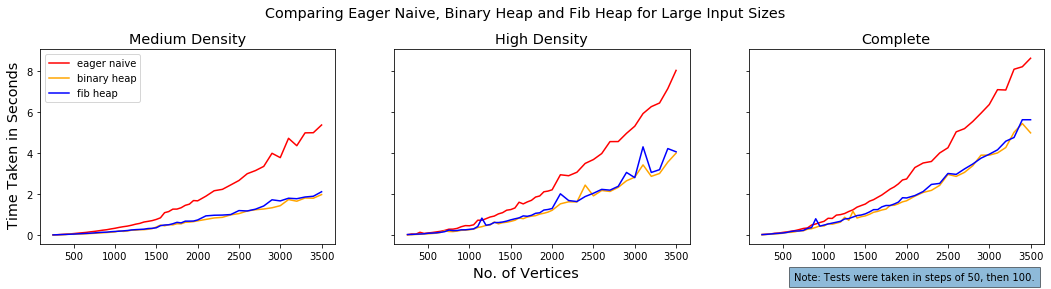

In [74]:
# Plotting large input size case

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4), sharey = True)
plt.subplots_adjust(top = 0.80)

fig.suptitle("Comparing Eager Naive, Binary Heap and Fib Heap for Large Input Sizes", fontsize = 'x-large', y = 0.95)
fig.text(0.5, 0.01, 'No. of Vertices', ha='center', fontsize = 'x-large')
fig.text(0.10, 0.47, 'Time Taken in Seconds', va='center', rotation='vertical', fontsize = 'x-large')

make_graph(axs[0], df1, False, "Medium Density", add_legend = True)
make_graph(axs[1], df2, False, "High Density")
make_graph(axs[2], df3, False, "Complete")

plt.figtext(0.8, 0, "Note: Tests were taken in steps of 50, then 100.", ha="center", fontsize=10, \
            bbox={"alpha":0.5, "pad":5})
plt.show()
fig.savefig('Comparing Eager Naive, Binary Heap and Fib Heap for Large Input Sizes.png', bbox_inches = 'tight')

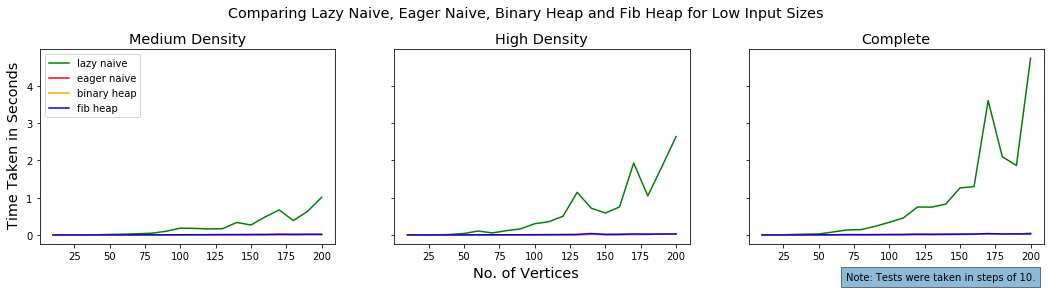

In [72]:
# Plotting low input size cases considering lazy naive

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4), sharey = True)
plt.subplots_adjust(top = 0.80)

fig.suptitle("Comparing Lazy Naive, Eager Naive, Binary Heap and Fib Heap for Low Input Sizes", fontsize = 'x-large', y = 0.95)
fig.text(0.5, 0.01, 'No. of Vertices', ha='center', fontsize = 'x-large')
fig.text(0.10, 0.47, 'Time Taken in Seconds', va='center', rotation='vertical', fontsize = 'x-large')

make_graph(axs[0], small1, True, "Medium Density", add_legend = True)
make_graph(axs[1], small2, True, "High Density")
make_graph(axs[2], small3, True, "Complete")

plt.figtext(0.82, 0, "Note: Tests were taken in steps of 10.", ha="center", fontsize=10, \
            bbox={"alpha":0.5, "pad":5})

plt.show()
fig.savefig('Comparing Lazy Naive, Eager Naive, Binary Heap and Fib Heap for Low Input Sizes.png', bbox_inches = 'tight')

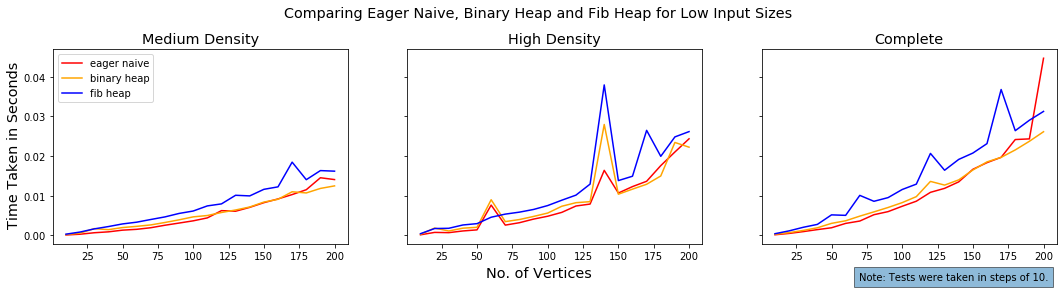

In [73]:
# Plotting low input size cases ignoring lazy naive
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4), sharey = True)
plt.subplots_adjust(top = 0.80)

fig.suptitle("Comparing Eager Naive, Binary Heap and Fib Heap for Low Input Sizes", fontsize = 'x-large', y = 0.95)
fig.text(0.5, 0.01, 'No. of Vertices', ha='center', fontsize = 'x-large')
fig.text(0.09, 0.47, 'Time Taken in Seconds', va='center', rotation='vertical', fontsize = 'x-large')

make_graph(axs[0], small1, False, "Medium Density", add_legend = True)
make_graph(axs[1], small2, False, "High Density")
make_graph(axs[2], small3, False, "Complete")

plt.figtext(0.82, 0, "Note: Tests were taken in steps of 10.", ha="center", fontsize=10, \
            bbox={"alpha":0.5, "pad":5})

plt.show()
fig.savefig('Comparing Eager Naive, Binary Heap and Fib Heap for Low Input Sizes.png', bbox_inches = 'tight')